(primer_signal-types)=
# Basic signal types

In this section, we will briefly introduce a few basic signal types that are commonly used in conceptual ocean acoustics discussions. 

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

import ipywidgets as widgets
from ipywidgets import interact

## Sine Wave

A sine wave is a signal with constant amplitude and frequency that can be described by:

$y(t) = A \sin(2 \pi f t + \mathcal{\phi)}$,

where:
* $A$ - peak of the deviation of the function from zero
* $f$ - the number of oscillations occurring within a second
* $\phi$ - where in the cycle the wave is at zero (in radians)


In [2]:
# Time base used for all signals in this section
N = 10000
end_time = 1
time = np.linspace(0, end_time, end_time*N, endpoint=False) # 1 sec

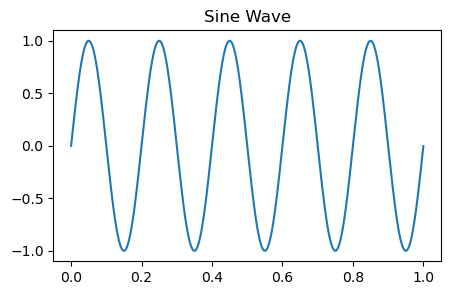

In [3]:
# Generate a 5 kHz sine wave
A = 1
freq = 5
cw = A*np.sin(2*np.pi*freq*time) # zero phase
plt.figure(figsize=(5,3))
plt.title("Sine Wave")
plt.plot(time, cw)
plt.show()

In [4]:
import IPython.display as ipd

freq = 100
ipd.Audio(A*np.sin(2*np.pi*freq*time), rate=N)

In [5]:
# Define the plot function
def plot_sine_wave(A, freq, end_time):
    cw = A * np.sin(2 * np.pi * freq * time)
    plt.figure(figsize=(5, 3))
    plt.title("Sine Wave")
    plt.plot(time, cw)
    plt.xlabel("Time")
    plt.xlim(0, end_time)
    plt.ylim(-2.1, 2.1)
    plt.show()

# Define the widgets
slider_style = {"description_width": "initial"}
A_slider = widgets.FloatSlider(value=1, min=0.1, max=2, step=0.1, 
                               description="Amplitude", style=slider_style)
freq_slider = widgets.IntSlider(value=5, min=1, max=15, step=1, 
                                description="Frequency (Hz)", style=slider_style)
end_time_slider = widgets.FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, 
                                      description="End Time (s)", style=slider_style)

# Use interact with the sliders
out = interact(plot_sine_wave, A=A_slider, freq=freq_slider, end_time=end_time_slider)

interactive(children=(FloatSlider(value=1.0, description='Amplitude', max=2.0, min=0.1, style=SliderStyle(desc…

## Chirp

Another example of a signal is a **chirp**, or a signal with an increasing or decreasing frequency.

We will generate example with linearly increasing frequency from 1Hz to 10Hz.

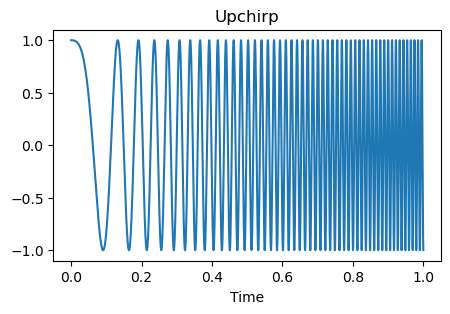

In [6]:
chirp = signal.chirp(time, f0=1, t1=1, f1=100)
plt.figure(figsize=(5,3))
plt.plot(time, chirp)
plt.xlabel("Time")
plt.title("Upchirp")
plt.show()

In [7]:
freq = 100
ipd.Audio(chirp, rate=N)

In [8]:
# Define the plot function
def plot_chirp(f0, f1, end_time):
    chirp = signal.chirp(time, f0=f0, t1=end_time, f1=f1)  # zero phase, upchirp
    plt.figure(figsize=(5,3))
    plt.title("Upchirp")
    plt.plot(time, chirp)
    plt.xlabel("Time")
    plt.xlim(0, end_time)
    plt.ylim(-1.1, 1.1)
    plt.show()

# Style for sliders
slider_style = {'description_width': 'initial'}

# Define the widgets
f0_slider = widgets.FloatSlider(
    value=1, min=0.1, max=20, step=0.1, 
    description="Start Frequency (Hz)", style=slider_style
)
f1_slider = widgets.FloatSlider(
    value=10, min=0.1, max=50, step=0.1, 
    description="End Frequency (Hz)", style=slider_style
)
end_time_slider = widgets.FloatSlider(
    value=1.0, min=0.1, max=5.0, step=0.1, 
    description="End Time (s)", style=slider_style
)

# Use interact
out = interact(plot_chirp, f0=f0_slider, f1=f1_slider, end_time=end_time_slider)

interactive(children=(FloatSlider(value=1.0, description='Start Frequency (Hz)', max=20.0, min=0.1, style=Slid…

Often when we want to transmit a chirp, we would **taper** the beginning and end of the signal, so that signal plays nicely with the physical turing on and off the transducer. 

We can achieve this by "windowing" a signal. The same technique is also often used to "cut out" part of a long signal.

There are many different window functions (see [here](https://docs.scipy.org/doc/scipy/reference/signal.windows.html) for a list in `scipy`). In the example below, we generate a Tukey window and use it to taper a chirp.

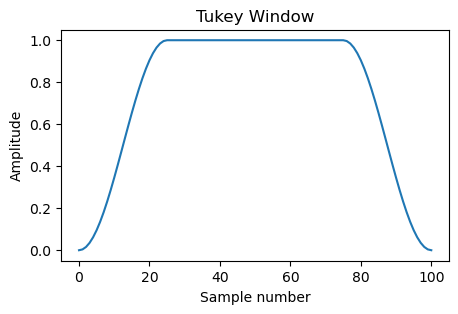

In [9]:
# Generate a tukey window
window = signal.windows.tukey(101)

plt.figure(figsize=(5,3))
plt.plot(window)
plt.title("Tukey Window")
plt.ylabel("Amplitude")
plt.xlabel("Sample number")
plt.show()

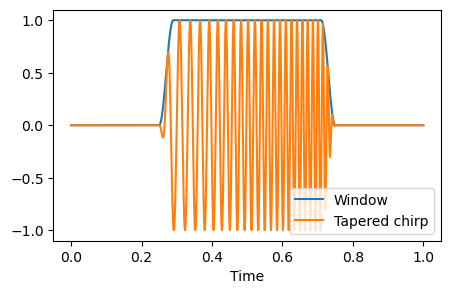

In [10]:
# Generate a tapered chirp
chirp = signal.chirp(time, f0=1, t1=1, f1=100)
left = np.zeros(int(len(chirp)/4))
right = np.zeros(int(len(chirp)/4))
middle_window = signal.windows.tukey(int(len(chirp)/2), alpha=0.16)

window = np.hstack((left, middle_window, right))
chirp_short =  chirp * window

plt.figure(figsize=(5,3))
plt.plot(time, window, label="Window")
plt.plot(time, chirp_short, label="Tapered chirp")
plt.xlabel("Time")
plt.legend()
plt.show()

In [11]:
ipd.Audio(chirp_short, rate=N)

## Impulse

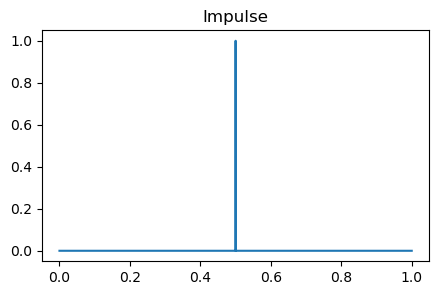

In [12]:
impulse = signal.unit_impulse(len(time), round(len(time)/2))
plt.figure(figsize=(5,3))
plt.plot(time, impulse)
plt.title("Impulse")
plt.show()

In [13]:
ipd.Audio(impulse, rate=N)